<a href="https://colab.research.google.com/github/annazxc/uni_projects/blob/main/NNfirst.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

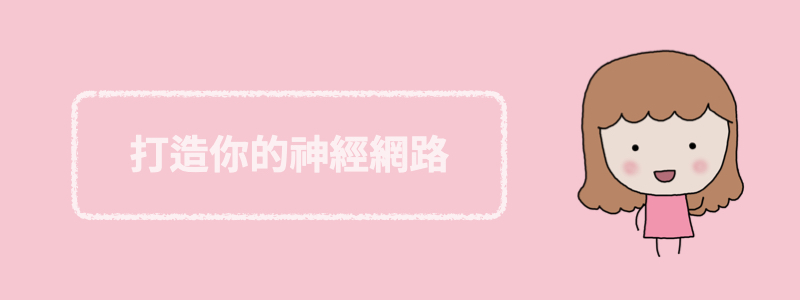

##Create a neural network
Data Preparation(MNIST)
modeling--> training-->evaluation-->fine-tuning-->deployment

Modeling:  
內容: 4層深度學習(4 layers), 設第一層 N1 神經元, 第二層 N2, 第三層 N3, 第四層 N4

In [142]:
'''FOR THE RESULTS OF EACH MODEL, PLEASE REFER TO THE SCREENSHOTS BELOW

Model 1
假設神經元個數為遞增的等差數列(隨機想的，訓練結果不好 N are randomly thought of, Unsatisfactory result as following)

N1 = 5
N2 = 10
N3 = 15
N4 = 20

Model 2
better result, but took longer to train than Model 1 since there are more neurals in each layer and it used more memory

N1=512
N2=256
N3=128
N4=64
'''
# Model 3
# approximately the same accuracy as N1=512 model and it uses less resources -->chose
N1=256
N2=128
N3=64
N4=32

##問chatgpt如何選模型
##Ask chatgpt what to consider when constructing model for MNIST

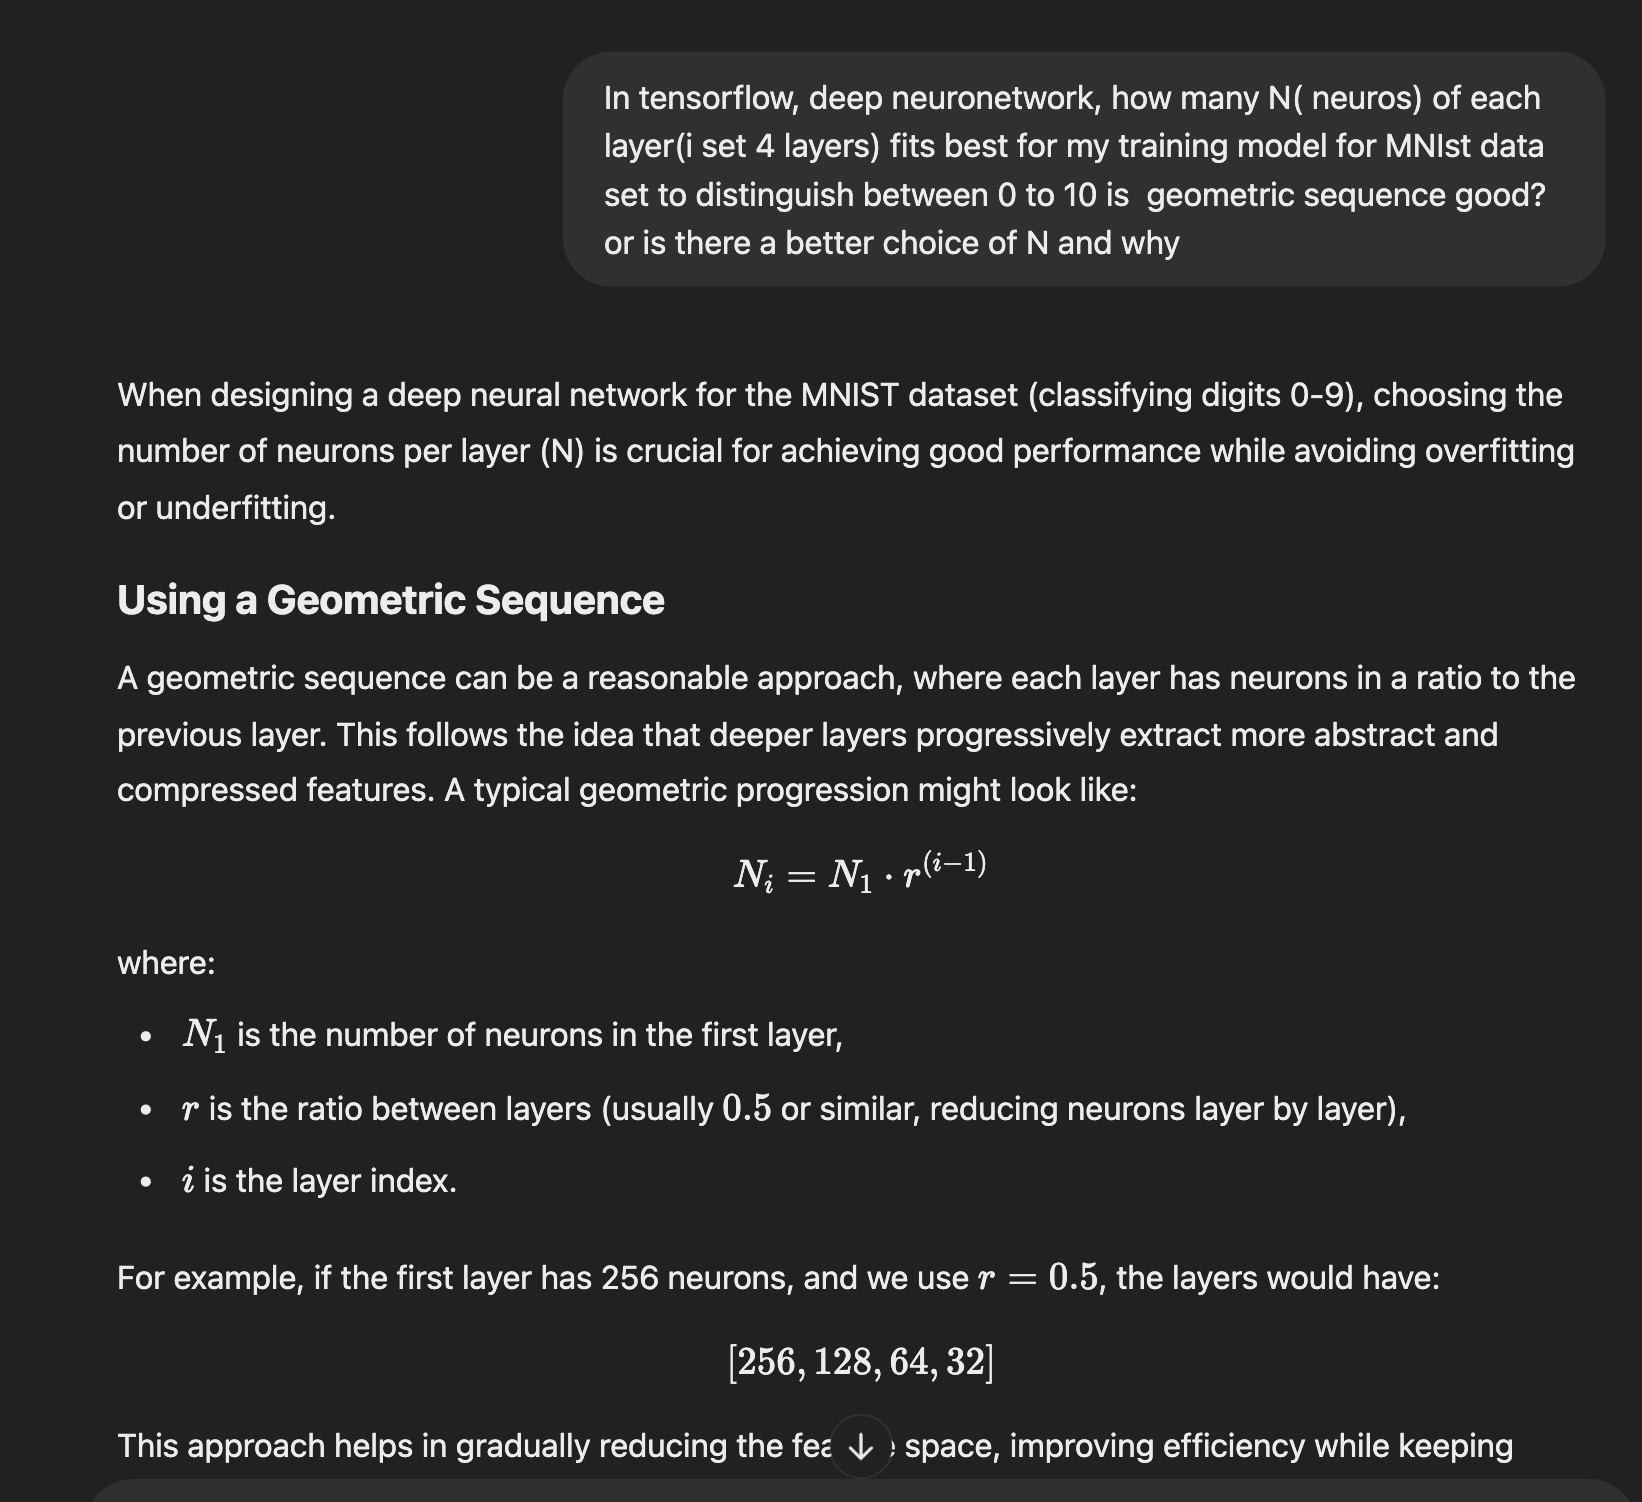



##Considerations for Choosing N   
Start with a Wide First Layer   
MNIST images are 28×28 (784 pixels), so the first layer should have enough neurons to capture features.  
Common choices: 256, 512, or 1024 neurons.  
Gradual Reduction   
A decreasing pattern (like geometric progression) is often better than a constant or increasing one because deeper layers focus on high-level abstractions.  

## For Model 1



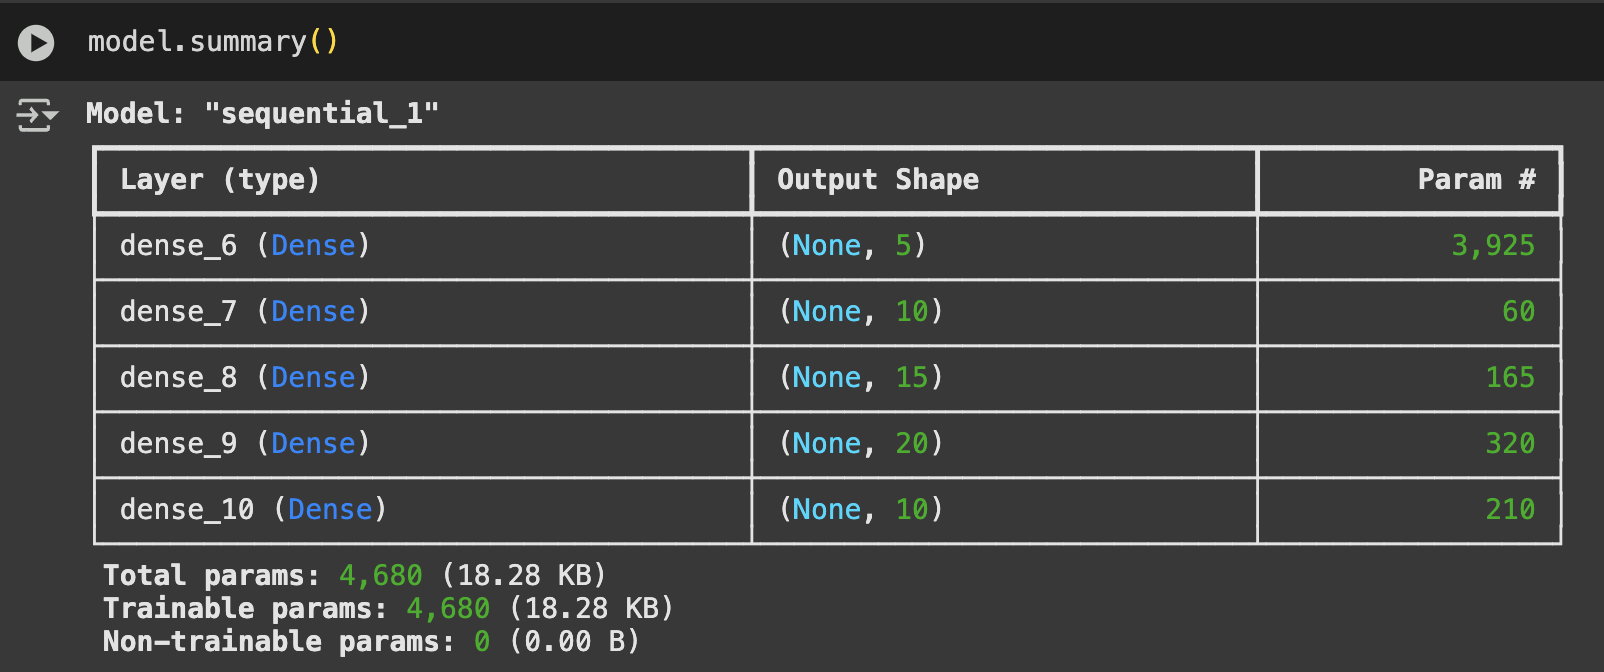

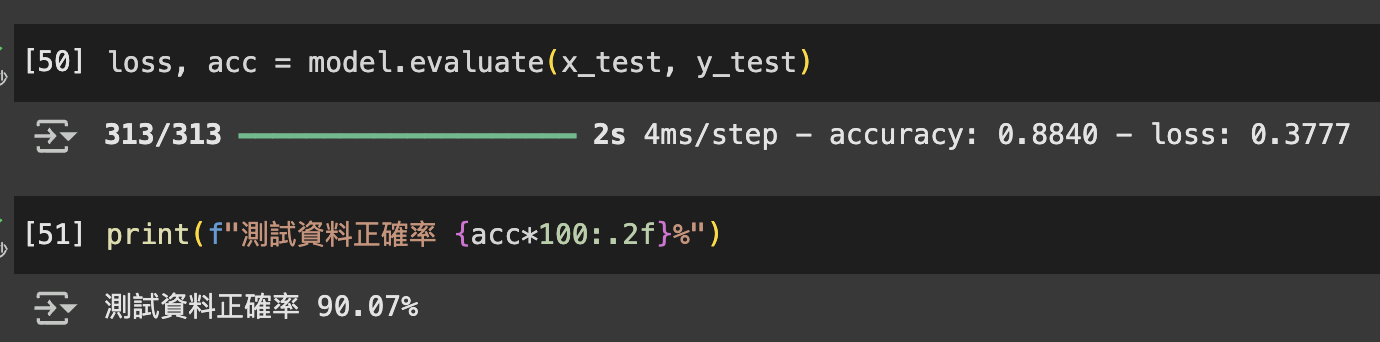

# For Model 2

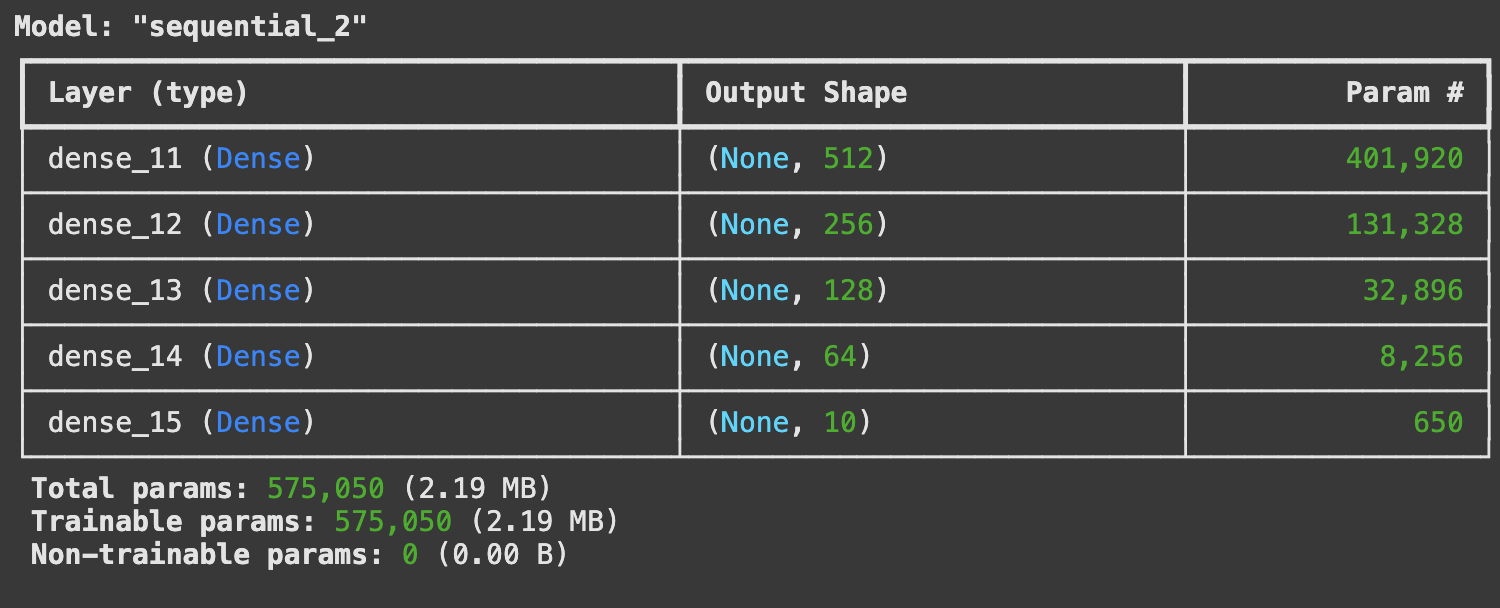

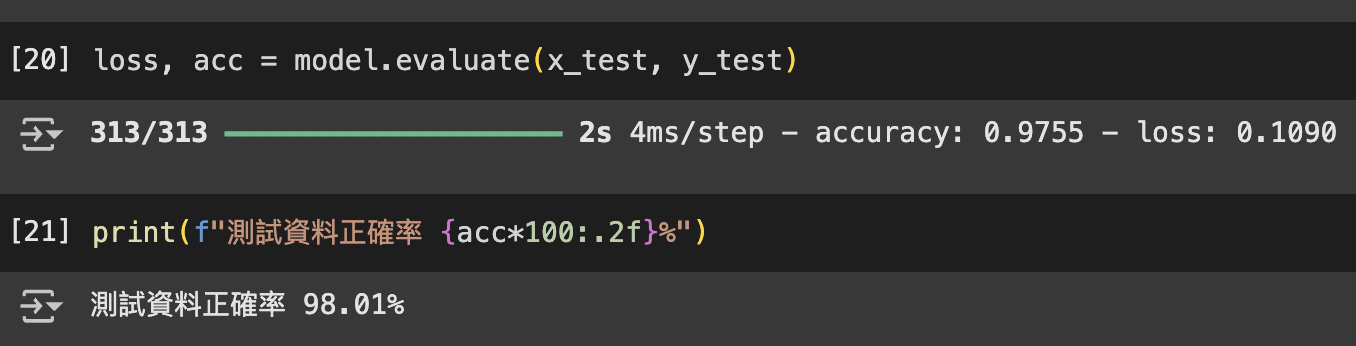

#For Model 3

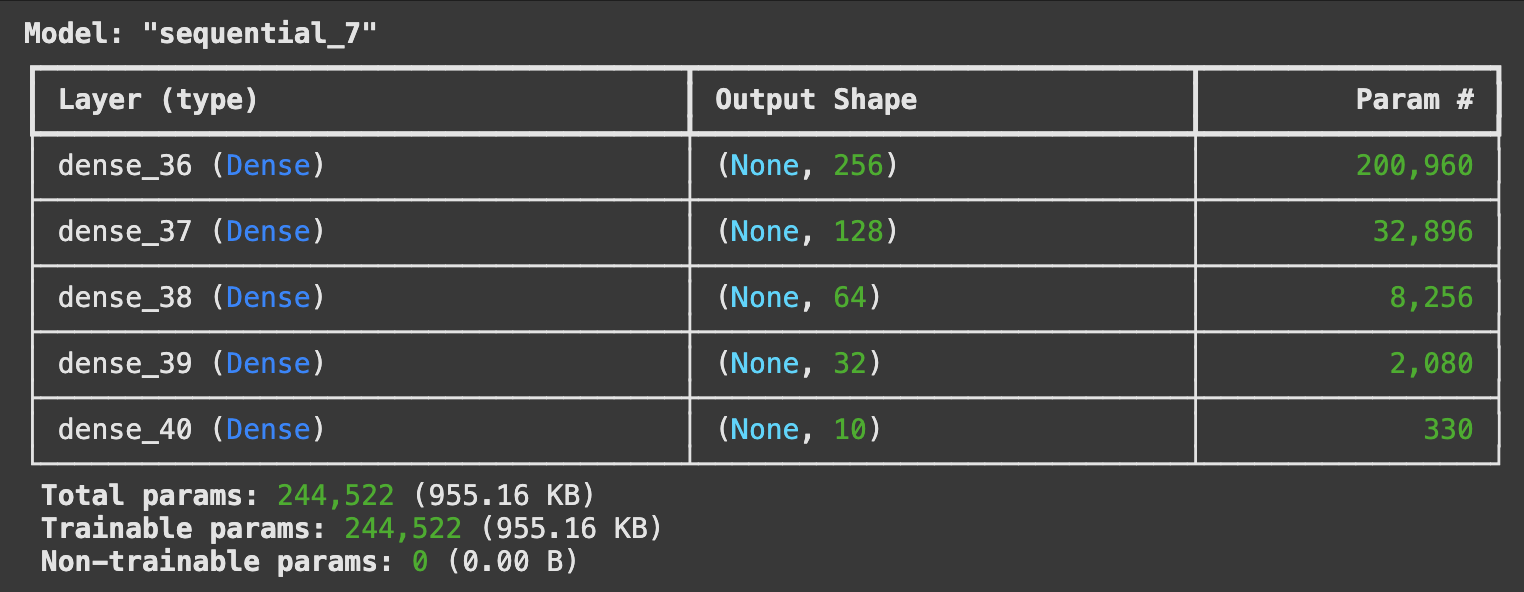

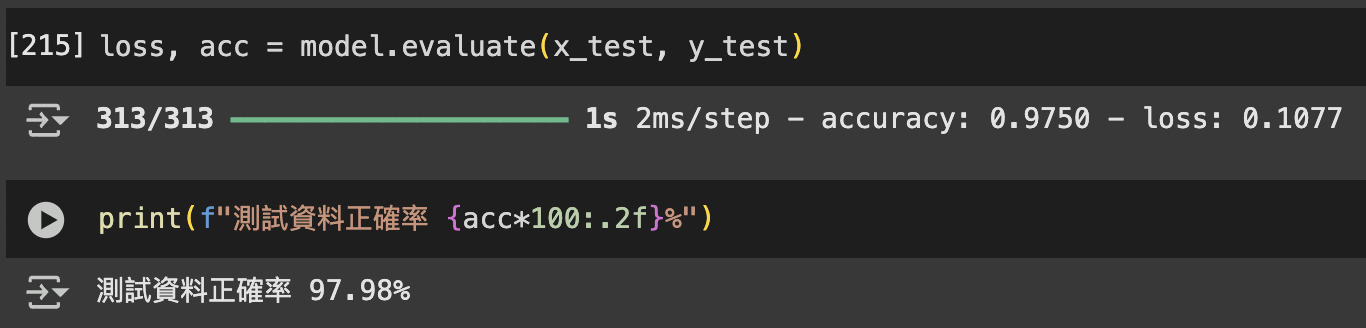

## 1. 讀入套件

In [143]:
!pip install gradio

In [144]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

from ipywidgets import interact_manual

import gradio as gr

## 2. Load the MNIST database
MNIST 是有一堆 0-9 的手寫數字圖庫。有 6 萬筆訓練資料, 1 萬筆測試資料。  
它是 "Modified" 版的 NIST 數據庫, 原來的版本有更多資料。  
這個 Modified 的版本是由 LeCun, Cortes, 及 Burges 等人做的。  
reference : [The original webpage of the database](http://yann.lecun.com/exdb/mnist/)。

MNIST 可以說是 Deep Learning 最有名的範例, 它被 Deep Learning 大師 Hinton 稱為「機器學習的果蠅」。

### 2.1 由 Keras 讀入 MNIST

In [145]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Number of training data and testing data

In [146]:
print(f'訓練資料總筆數為 {len(x_train)} 筆資料')
print(f'測試資料總筆數為 {len(x_test)} 筆資料')

訓練資料總筆數為 60000 筆資料
測試資料總筆數為 10000 筆資料


### 2.2 數據庫的內容 Contents of the database

Each input (x) is an image of a handwritten digit from 0 to 9, with a size of 28x28.  

The output (y) is the "correct answer" corresponding to the digit.

In [147]:
x_train.shape

(60000, 28, 28)

In [148]:
x_train[3658]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   8,  43,
         96, 218, 253, 175,  29,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  36, 157, 252,
        252, 252, 252, 253, 231,  16,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 203, 253, 252,
        233, 126, 126, 200, 252,  21,   0,   0,   0,  52, 135, 206,  30,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 185, 253, 252,
        202,  48,   0,  49, 128,   7,   0,   0, 126, 232, 252, 252, 147,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  18, 122, 252,
        252, 242,  79,   0,   0,   0,  71, 194, 253, 252, 252, 252,  59,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  36,
        224, 253, 253, 107,  15, 192, 253, 253, 254, 239, 158,  35,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         48, 252, 252, 217, 211, 252, 252, 252, 186,  42,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         13, 217, 252, 253, 252, 252, 238,  99,   9,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  22,
        167, 252, 252, 253, 252, 212,  28,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 124, 225,
        252, 252, 252, 253, 252,  38,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  55, 236, 254, 253,
        250, 211, 185, 255, 253,  83,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  52, 232, 252, 253, 224,
        110,   0, 106, 253, 252, 126,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  43, 234, 252, 252, 170,  40,
          0,   0, 203, 253, 252,  29,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  11, 171, 252, 252, 155,   0,   0,
          0,   0, 211, 253, 252,  21,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  87, 252, 252, 155,   7,   0,   0,
          0,   0, 211, 253, 217,  12,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 148, 253, 241,  35,   0,   0,   0,
          0,  38, 236, 255, 168,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 148, 252, 238,  28,   0,   0,   0,
          8, 171, 252, 253,  89,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  48, 247, 252, 212,  39,  39, 162,
        234, 252, 252, 161,   5,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 120, 252, 252, 252, 253, 252,
        252, 252, 155,  35,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

In [149]:
y_train[3658]

8

### 2.3 Encoding input data

標準神經網路學手寫辨識  
原來的每筆數據是個 28x28 的矩陣 (array), 即28x28=784 長的一維向量。   
且每格 8 bit(由資料集中得知）, 2^8=256, 可能為0--255,  
但不喜歡數字那麼大, 因此要標準化 normalization。  
用 `reshape` 調校一下,使所有數字分布在0--1間（亦可改為常態分布）  

Each of the original data point is a 28x28 matrix (array),   
which means it’s a one-dimensional vector of length 784 (28x28=784).  

From the dataset, we can infer each pixel is 8 bits,   
with values ranging from 0 to 255 (2^8 = 256).   
However, these large numbers are not ideal, so normalization is applied.  

By using reshape,  
we can adjust the data so that all the pixel values are distributed between 0 and 1   
(alternatively, they can be transformed into a normal distribution).

In [150]:
x_train = x_train.reshape(60000, 784)/255
x_test = x_test.reshape(10000, 784)/255

In [151]:
x_train.shape

(60000, 784)

### 2.4 輸出格式整理
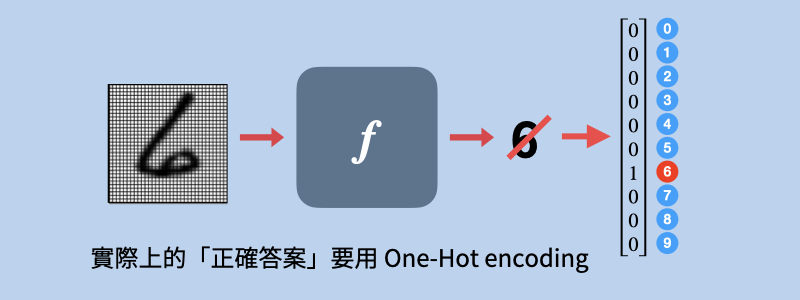

## Encoding output data
$$\hat{f} \colon \mathbb{R}^{784} \to \mathbb{R}$$  
It’s not ideal to directly convert our 784-dimensional vector into a single dimension because the neural network we trained may have some errors. As a result, the output might not be an integer, making it impossible to categorize. Therefore, we use one-hot encoding.  

e.g.

* 2-> [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
* 5 -> [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]


In [152]:
#one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

看一下結果, 成功將輸出變成判斷數字為0--9某個數字的1-hot編碼 (the result)

In [153]:
y_train[3658]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.])

## 3. Building the first neural network

The function

$$\hat{f} \colon \mathbb{R}^{784} \to \mathbb{R}^{10}$$

且決定第一次要用標準神網路試試, 所以只需再決定要幾個隱藏層、每層要幾個神經元,  
用哪個激發函數就可以了。

We decided to use a dense neural network for this model.  
Now, all that's left is to decide how many hidden layers to use,  
how many neurons per layer, and which activation function to choose.

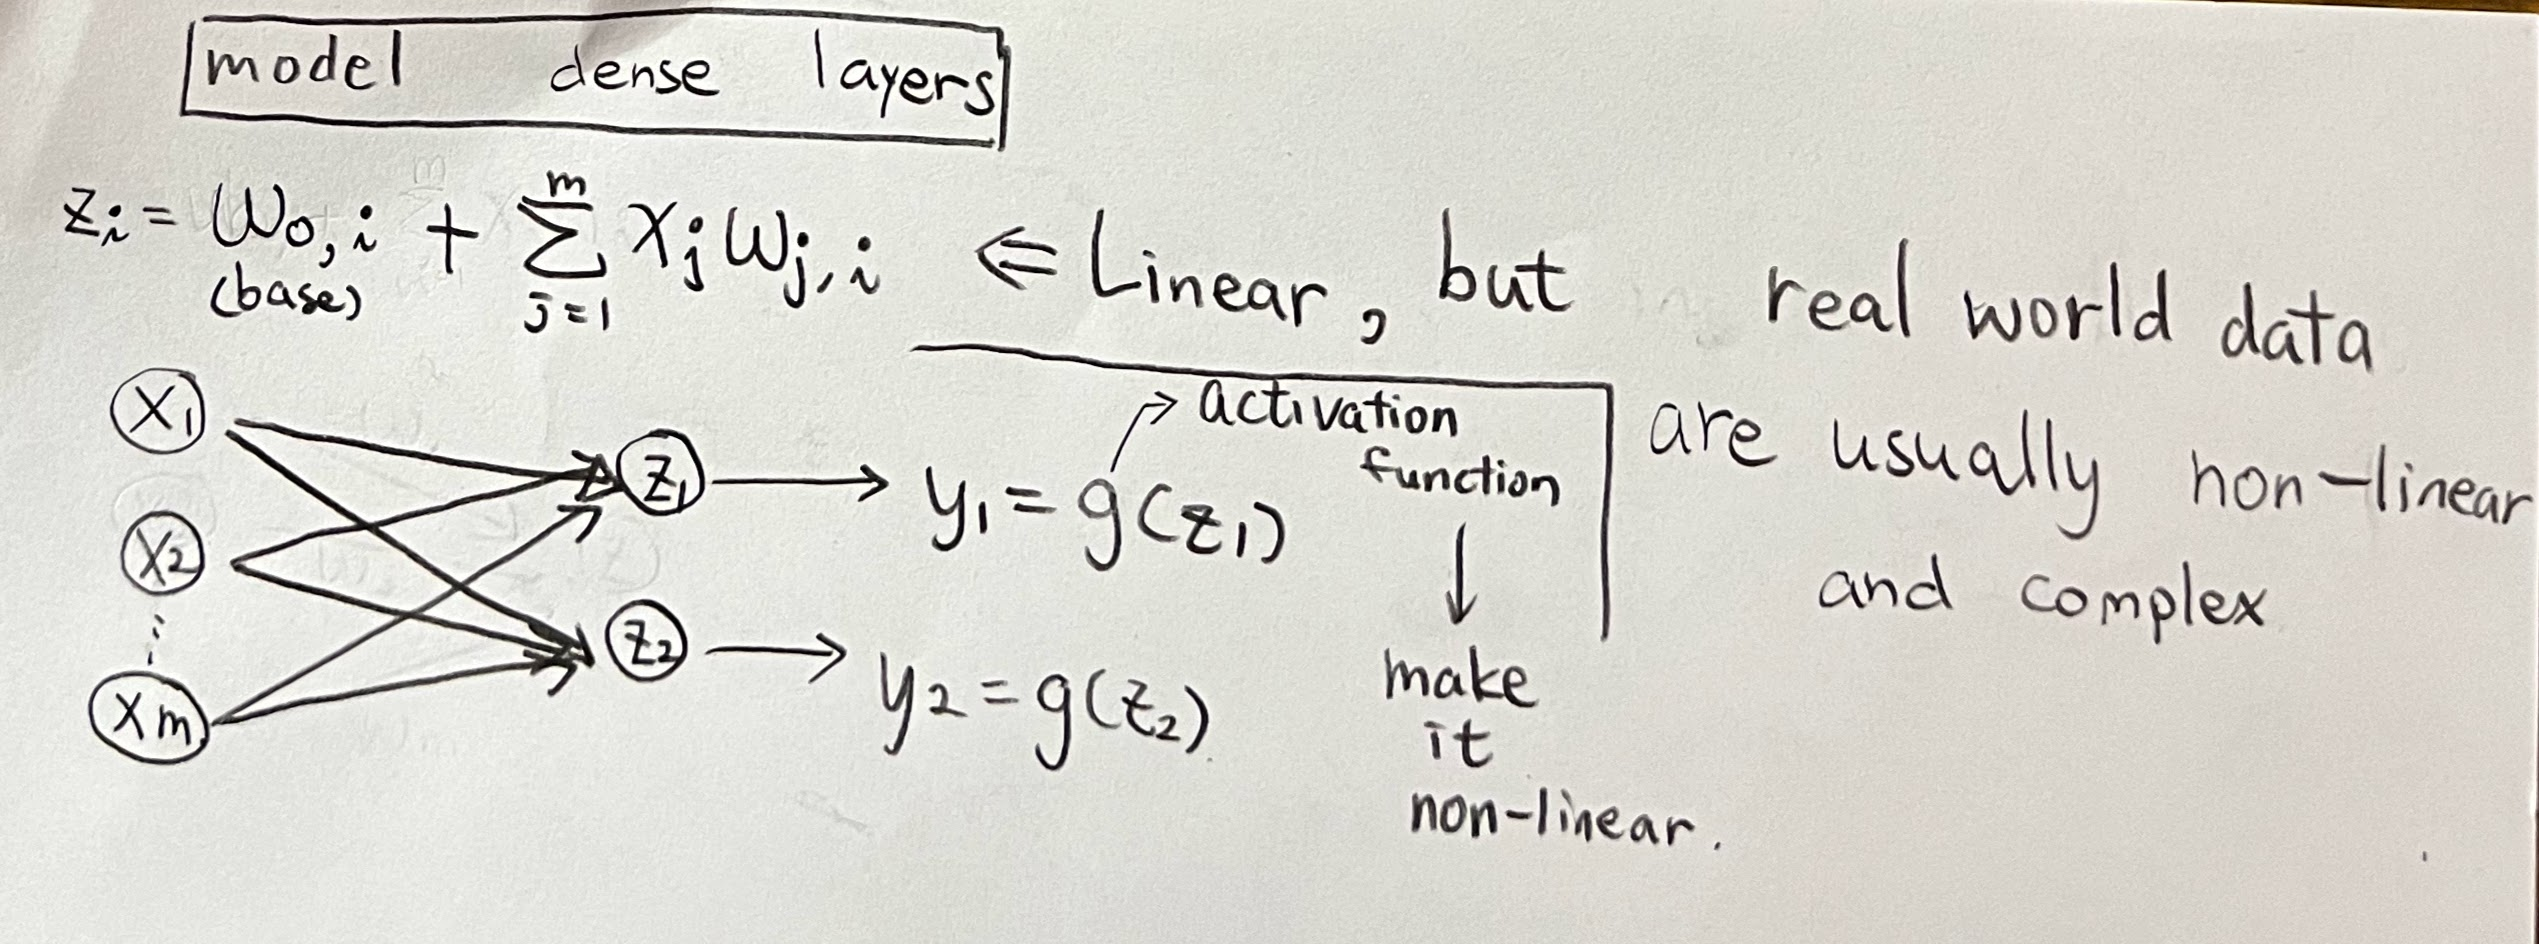

##A neural network has two key structural dimensions:  
1.Depth (number of layers)
More layers mean more non-linearity (因有更多的activation function,可以更非線性化）,  
 allowing the model to capture more complex patterns and hierarchical representations.  

2.Width (neurons per layer)  
More neurons in a layer mean the model can process more features simultaneously（單層能處理多個輸入轉成輸出,每層取得較多參數）  
capturing more details in a single transformation.  

### 3.1 決定神經網路架構、讀入相關套件

要設計神經網路, 需要指定多少個隱藏層、每層多少個神經元和使其非線性化的激發函數。  

### 3.2 建構神經網路

打開一個空的神經網路（函數學習機）。  
標準一層一層傳遞的神經網路叫 `Sequential`。

In [154]:
model = Sequential()

每次用 `add` 去加一層, 從第一個隱藏層開始。  
且需告知輸入有幾個維度, 此處決定激發函數為ReLU.  

SIDE NOTES:  
It's better to use the same activation function within a layer.  
Ensures:   
1.consistent gradient flow   
2.simplify training  
3.avoid feature scale discrepancies across layers  
Thus, we choose ReLU as the activation function for all hidden layers,  
which simplified the model ,since the model is non-linear only at the origin.

In [155]:
model.add(Dense(N1, input_dim=784, activation='relu'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


第二層開始就不用再說明輸入神經元個數 (因為就是前一層神經元數)(全連結dense）

In [156]:
model.add(Dense(N2, activation='relu'))
model.add(Dense(N3, activation='relu'))
model.add(Dense(N4, activation='relu'))

Since there are 10 possible digits in the output, the output layer will have 10 neurons.
If our network output is

$$(y_1, y_2, \ldots, y_{10})$$

We also hope that

$$\sum_{i=1}^{10} y_i = 1$$

使輸出符合機率，各事件總和等於一，如何做呢？用 `softmax` 當激發函數就可以!!  
To make the output represent probabilities, where the sum of all events equals 1, we can use the softmax activation function.

In [157]:
model.add(Dense(10, activation='softmax'))

At this point, the first neural network is ready!

### 3.3 組裝

要做 `compile` 才正式把我們的神經網路建好。需要做幾件事:

* 決定使用的 loss function, 此處為分類問題 multi-class classification problem,  
常用Cross-Entropy Loss
* 決定 optimizer, 我們用 SGD隨機梯度下降   
SGD's randomness helps escape local minima by adding gradient fluctuations.
* learning rate 使用 Adam( )能自動調節,  
takes larger steps initially to reduce loss quickly,  
then smaller steps to refine the solution and prevent overshooting.


* metrics=['accuracy'] 用來回報正確率，看目前訓練成效
    

In [158]:
from tensorflow.keras.optimizers import Adam
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])


## 4. 檢視神經網路

In [159]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                     │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 244,522 (955.16 KB)

 Trainable params: 244,522 (955.16 KB)

 Non-trainable params: 0 (0.00 B)

## 5. 訓練神經網路
有兩件事要決定:

* 一次要訓練幾筆資料 (`batch_size`)
* 這 6 萬筆資料一共要訓練幾次 (`epochs`)


In [160]:
model.fit(x_train, y_train, batch_size=100, epochs=10)

Epoch 1/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8503 - loss: 0.5162
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9681 - loss: 0.1062
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9787 - loss: 0.0688
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9847 - loss: 0.0473
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9879 - loss: 0.0378
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9892 - loss: 0.0328
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9918 - loss: 0.0257
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9931 - loss: 0.0211
Epoch 9/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9945 - loss: 0.0159
Epoch 10/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9941 - loss: 0.0179


## 6. Results

In [161]:
loss, acc = model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9746 - loss: 0.0967


In [162]:
print(f"測試資料正確率 {acc*100:.2f}%")

測試資料正確率 97.72%


"predict" 放的是神經網路的學習結果。之後用 argmax 找到數值最大的那一項。  
"predict" is the result of our neural network's learning.    
Afterward, we use argmax to find the item with the largest value.

In [163]:
predict = np.argmax(model.predict(x_test), axis=-1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [164]:
predict

array([7, 2, 1, ..., 4, 5, 6])

We have to reshape `x_test` data back from 784-dim to 28*28 array to show the picture

In [165]:
def test(測試編號):
    plt.imshow(x_test[測試編號].reshape(28,28), cmap='Greys')
    print('神經網路判斷為:', predict[測試編號])

In [166]:
interact_manual(test, 測試編號=(0, 9999));

interactive(children=(IntSlider(value=4999, description='測試編號', max=9999), Button(description='Run Interact', …

In [180]:
score = model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9746 - loss: 0.0967


In [181]:
print('loss:', score[0])
print('accuracy', score[1])

loss: 0.08893904089927673
accuracy 0.9771999716758728


### 7. Use Gradio to present

In [182]:
def resize_image(inp):

    image = np.array(inp["layers"][0], dtype=np.float32)
    image = image.astype(np.uint8)

    image_pil = Image.fromarray(image)

    background = Image.new("RGB", image_pil.size, (255, 255, 255))
    background.paste(image_pil, mask=image_pil.split()[3])
    image_pil = background

    image_gray = image_pil.convert("L")

    img_array = np.array(image_gray.resize((28, 28), resample=Image.LANCZOS))

    img_array = 255 - img_array

    img_array = img_array.reshape(1, 784) / 255.0

    return img_array

In [183]:
def recognize_digit(inp):
    img_array = resize_image(inp)
    prediction = model.predict(img_array).flatten()
    labels = list('0123456789')
    return {labels[i]: float(prediction[i]) for i in range(10)}

In [185]:
iface = gr.Interface(
    fn=recognize_digit,
    inputs=gr.Sketchpad(),
    outputs=gr.Label(num_top_classes=3),
    title="MNIST 手寫辨識",
    description="Please write a number"
)

iface.launch(share=True, debug=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://d1f793950bf2367b5d.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7861 <> https://d1f793950bf2367b5d.gradio.live


# Handwriting Results

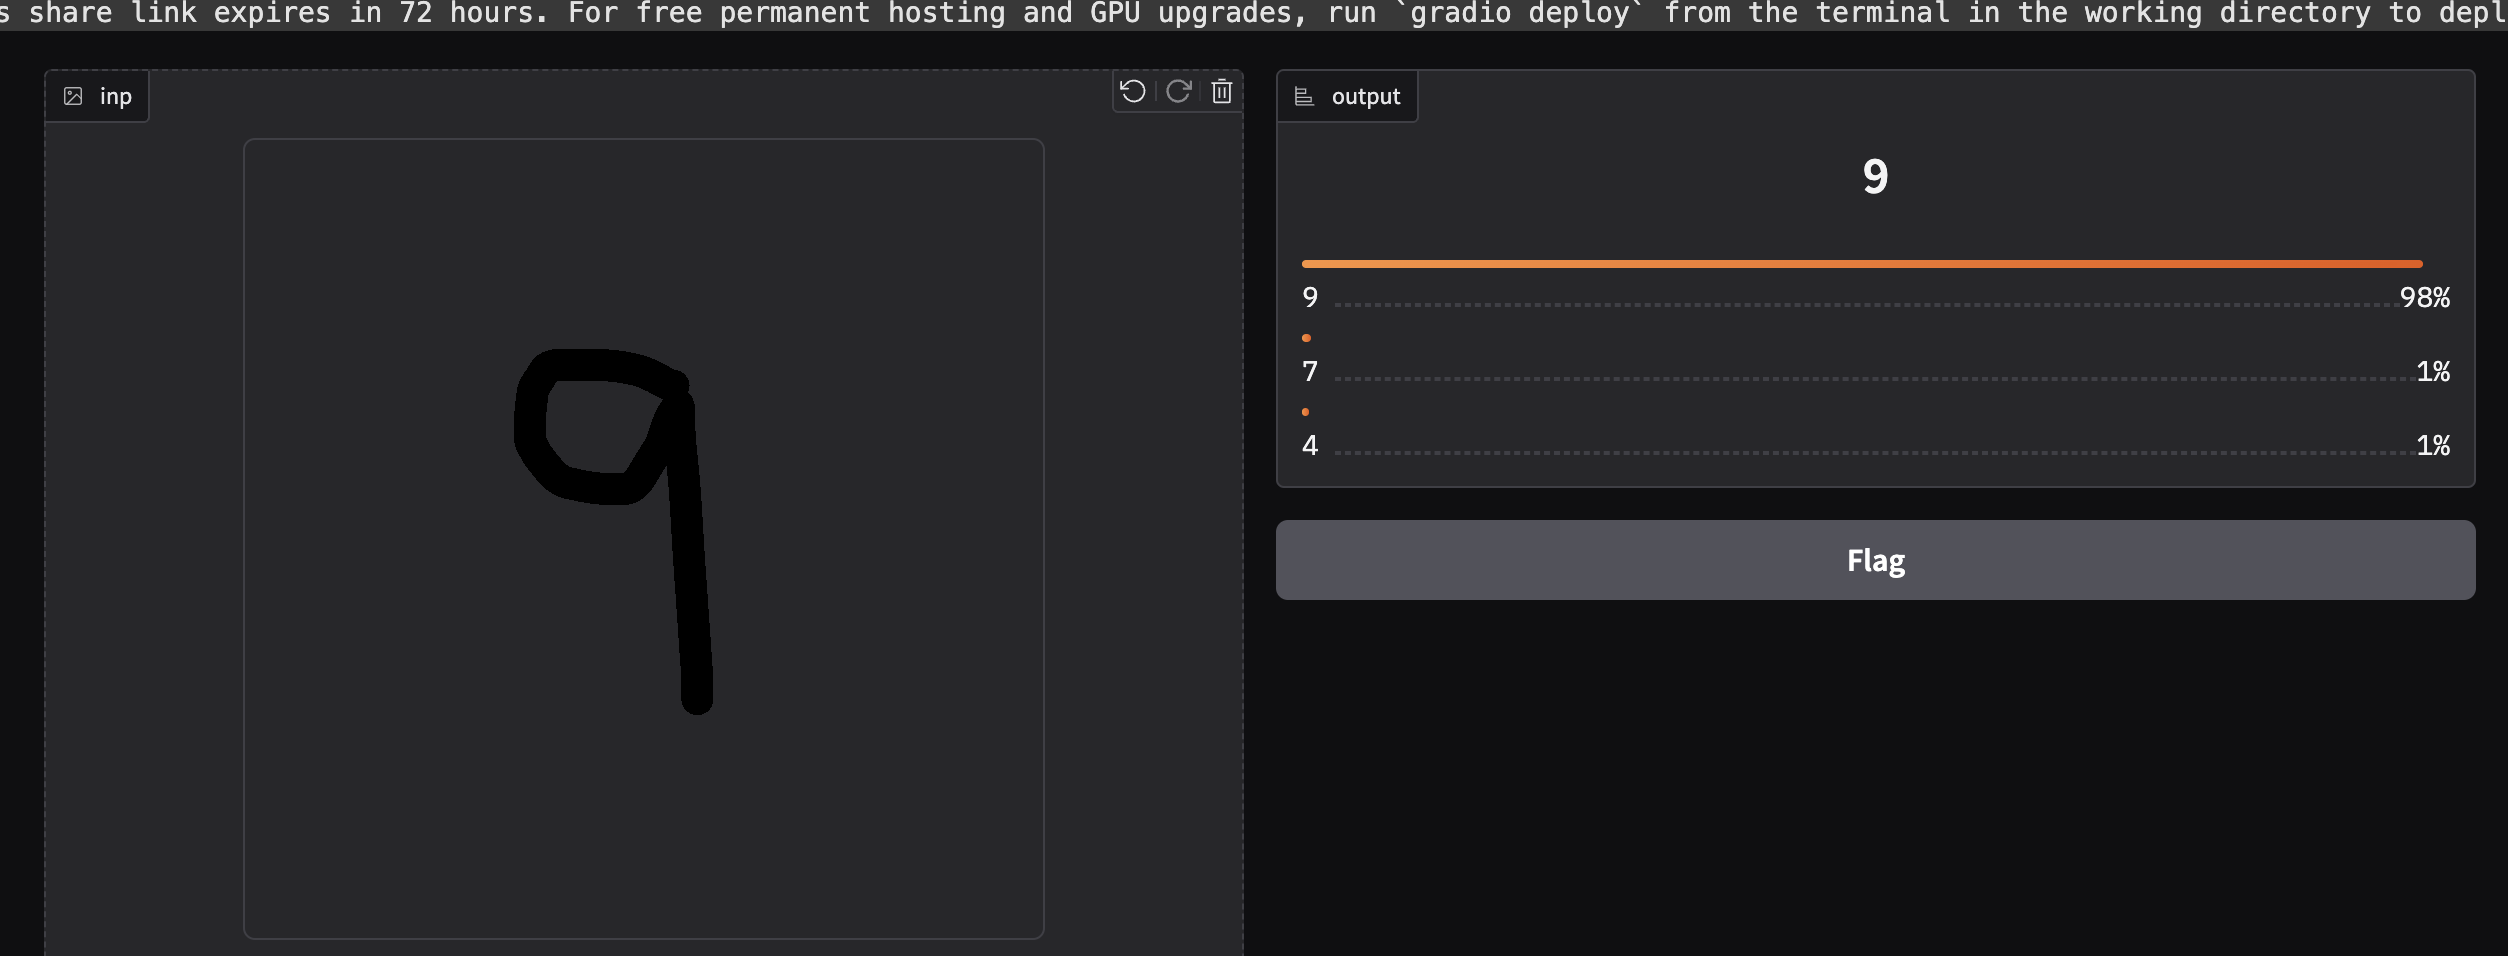

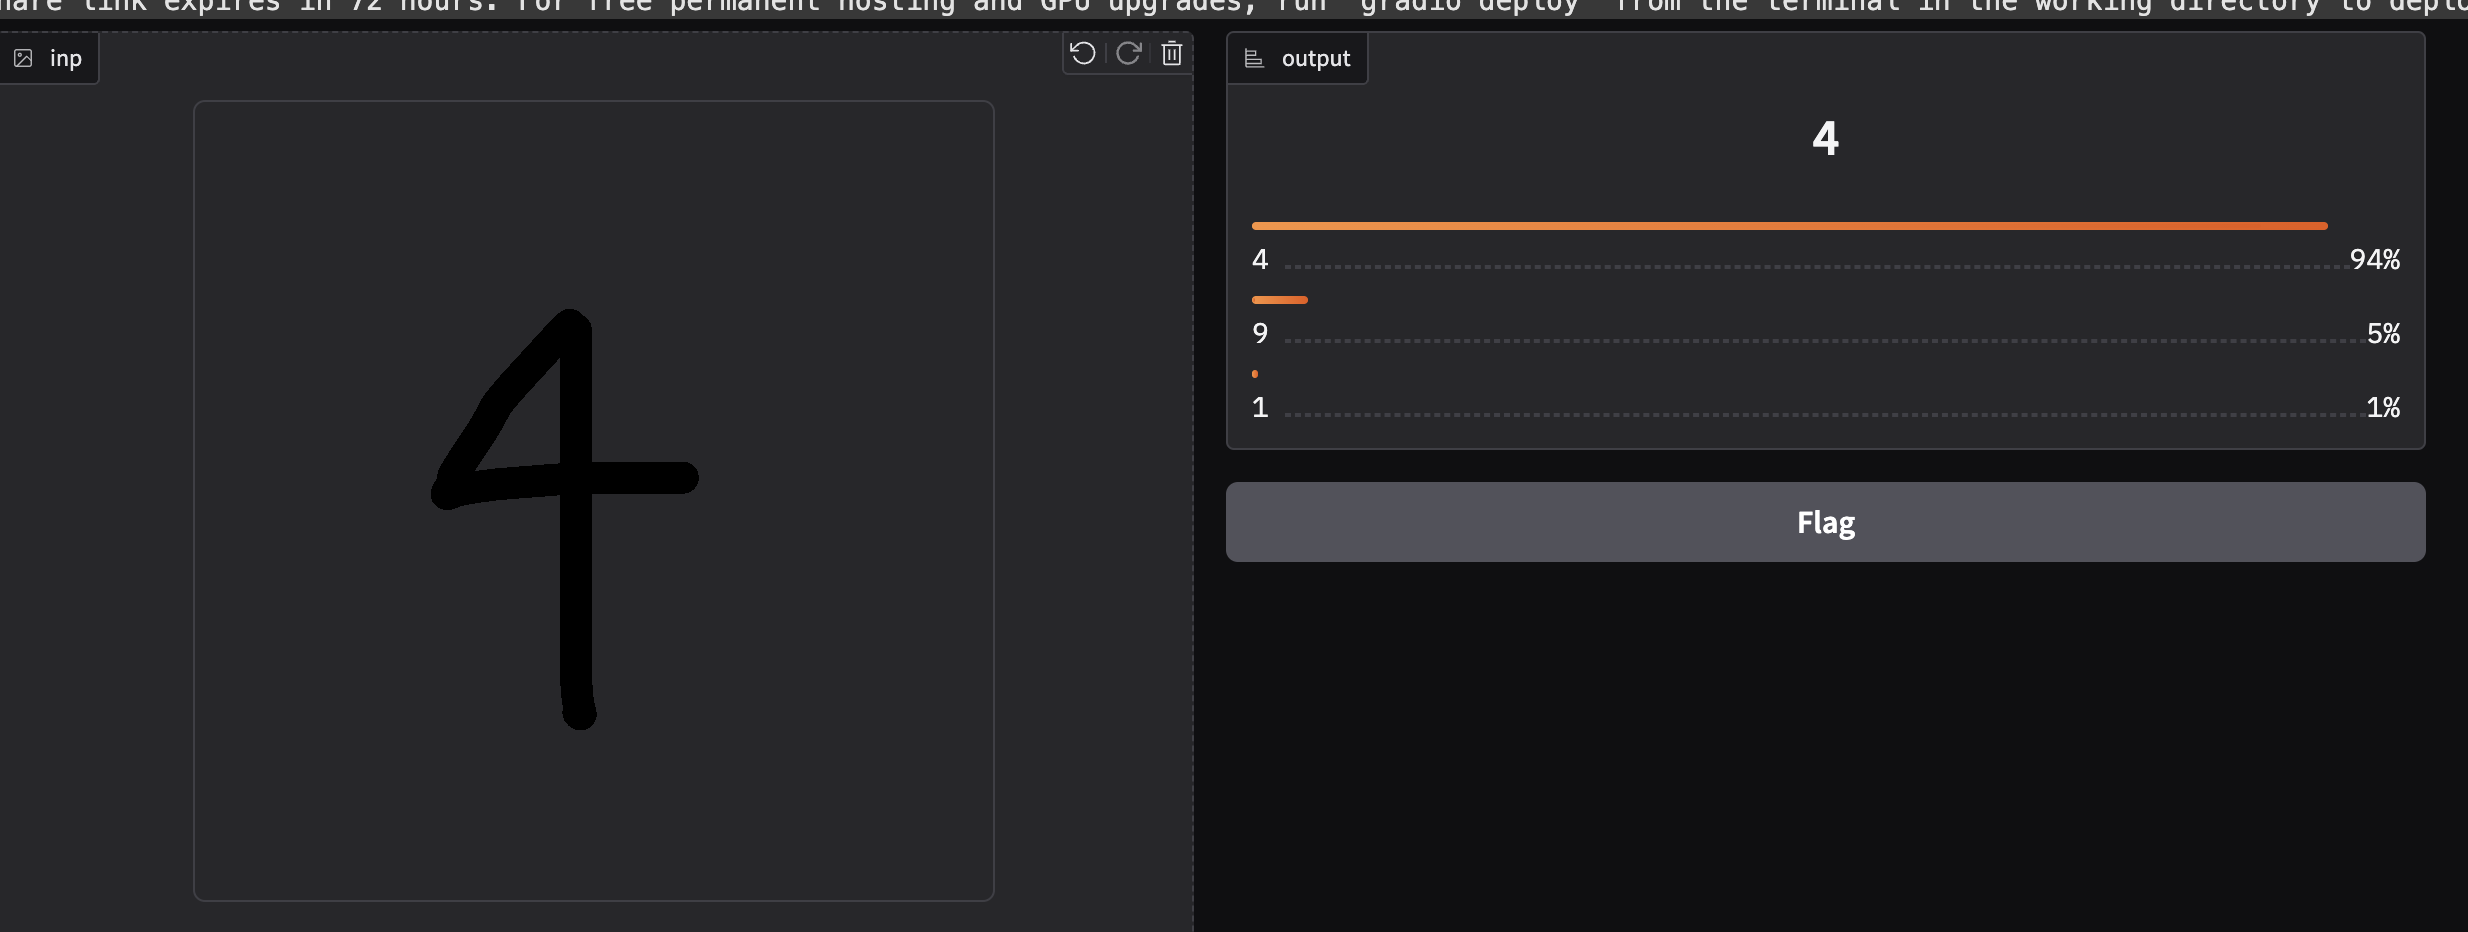

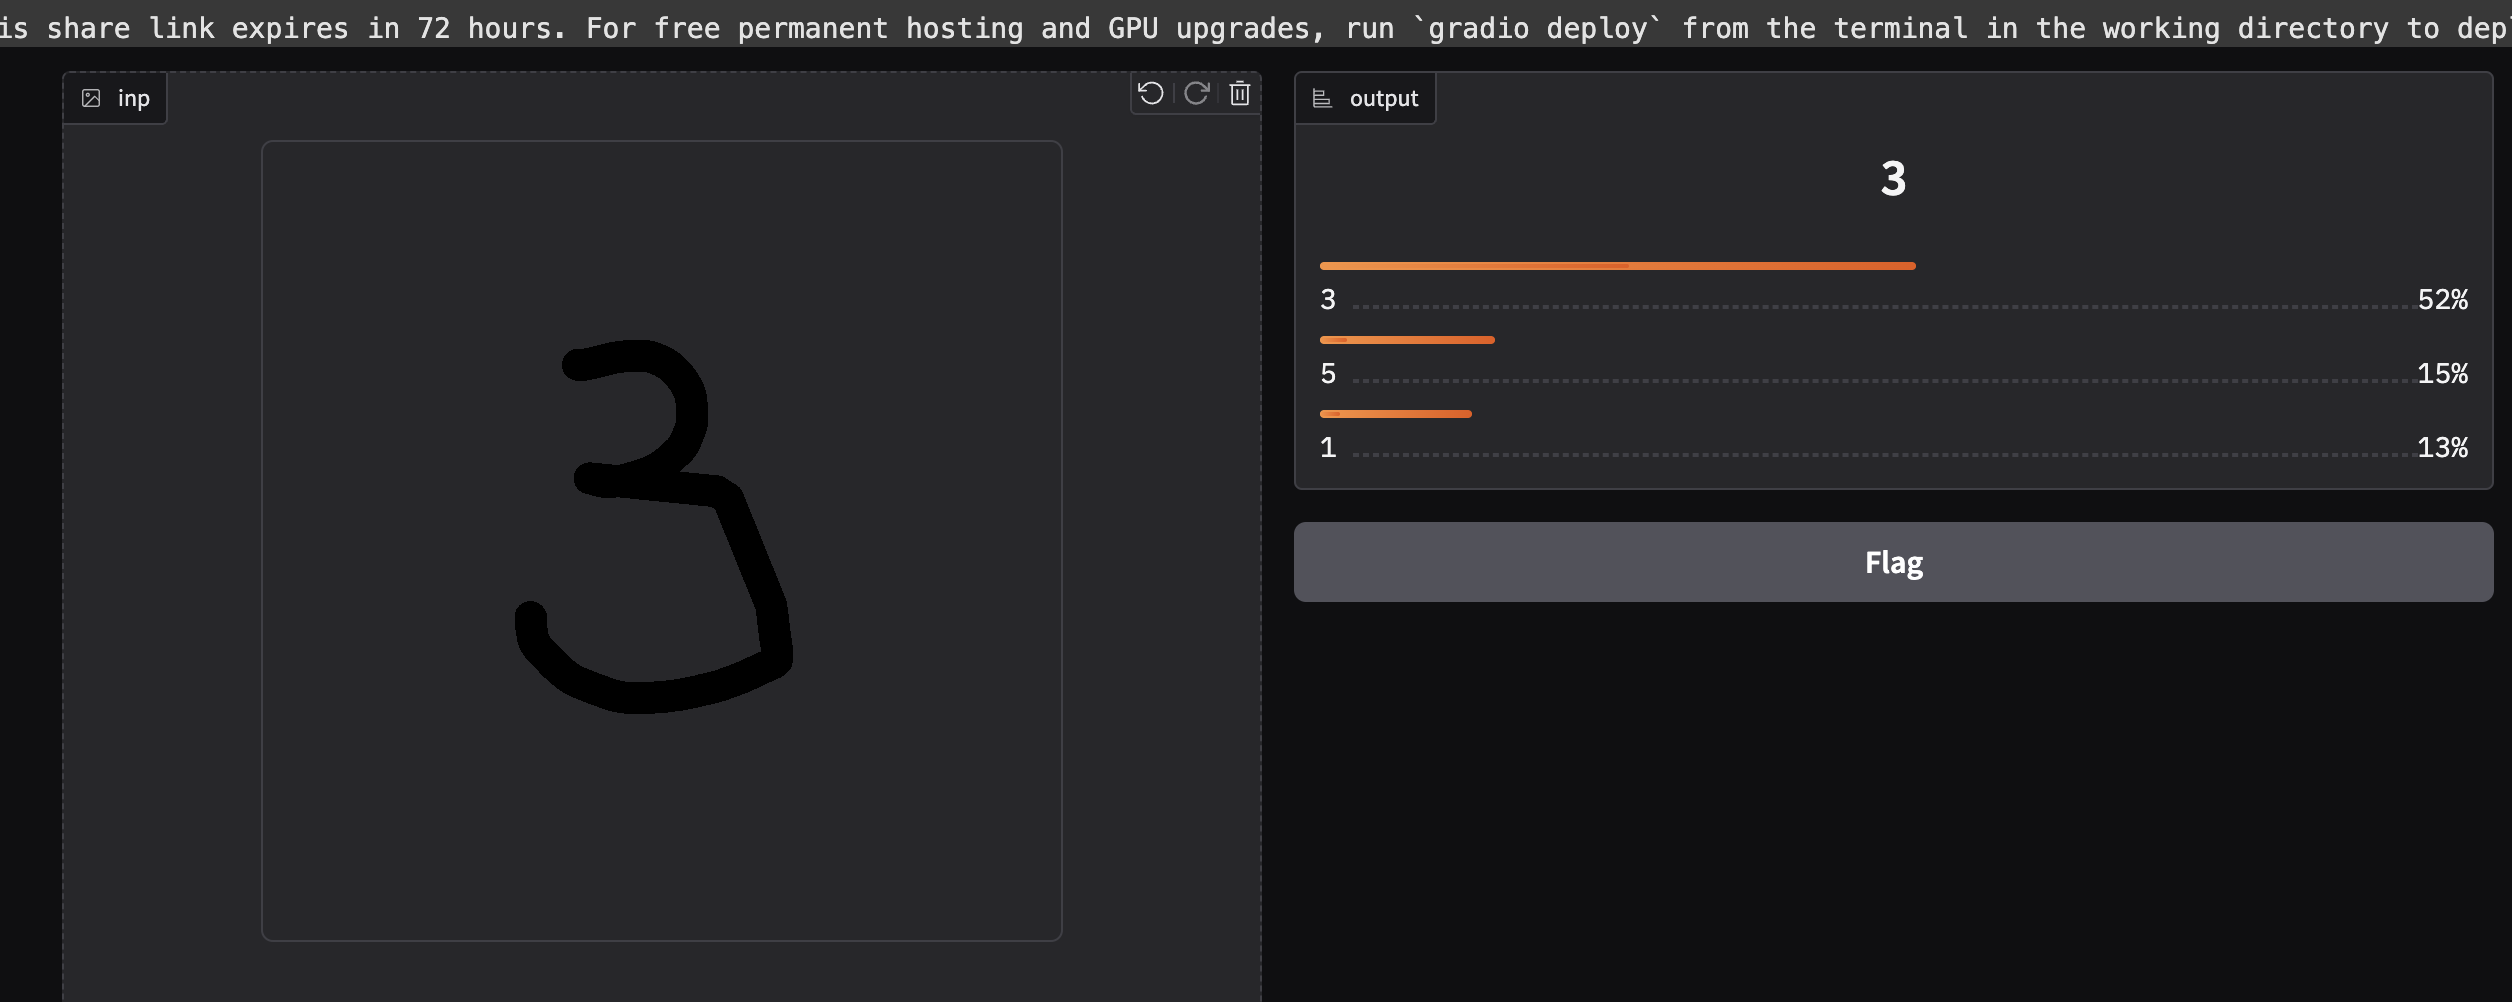

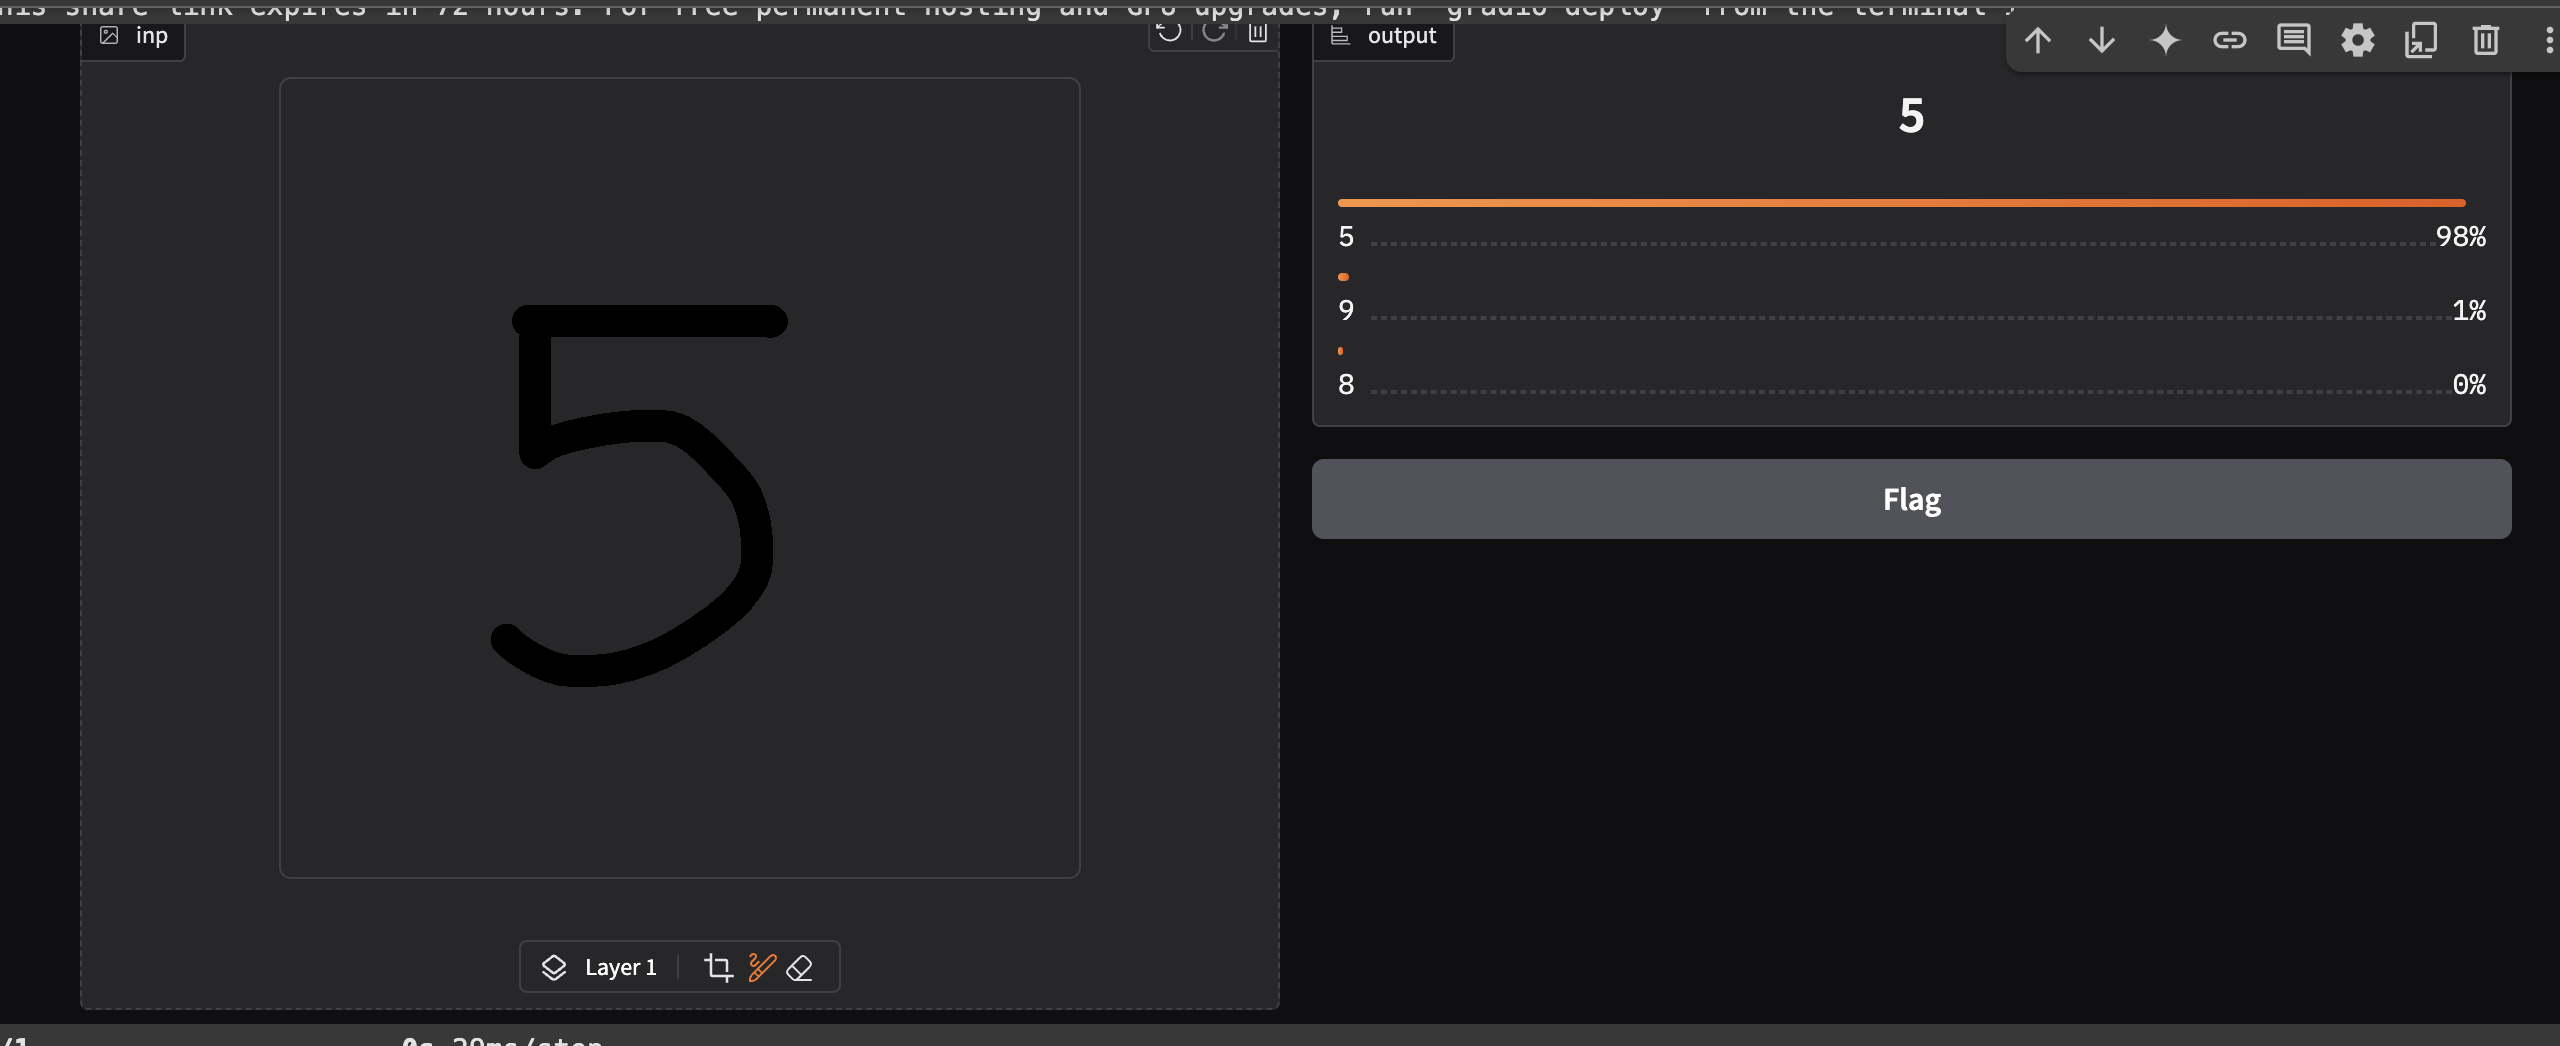